In [20]:
import numpy as np
import json
import pickle
import timeit
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [2]:
trainfile = "./data/train.json"
devfile = "./data/dev.json"

In [3]:
train_labels = []
f = open(trainfile,"r")
while(True):
    s = f.readline()
    if (s==""):
        break
    json_dump = json.loads(s)    
    train_labels.append(json_dump["ratings"])
f.close()

In [4]:
dev_labels = []
dev_data = []
f = open(devfile,"r")
while(True):
    s = f.readline()
    if (s==""):
        break
    json_dump = json.loads(s)    
    dev_labels.append(json_dump["ratings"])
    dev_data.append(json_dump["review"])
f.close()

In [6]:
train_feature_vector = pickle.load(open("train_vector.pickle","rb"))
train_feature_vector.shape

(100000, 312000)

In [7]:
dev_feature_vector = pickle.load(open("dev_vector.pickle","rb"))
dev_feature_vector.shape

(5000, 312000)

In [24]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Naive Bayes Classifier

In [8]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

#### Training the model

In [9]:
start = timeit.default_timer()
print(model.fit(train_feature_vector, train_labels))
print("Train time:",timeit.default_timer()-start)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Train time: 0.35227155999746174


In [10]:
pickle.dump(model,open("nb_model.pickle", "wb"))

#### Testing the model

In [18]:
y_pred = model.predict(dev_feature_vector)
conf_mat = confusion_matrix(dev_labels, y_pred)

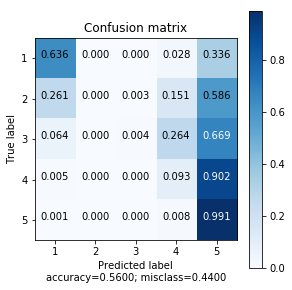

In [25]:
plot_confusion_matrix(conf_mat, target_names=[1,2,3,4,5], normalize=True)

### MaxEnt Classifier

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="l2", multi_class='multinomial', solver="saga", max_iter=2000)

#### Training the model

In [27]:
start = timeit.default_timer()
print(model.fit(train_feature_vector, train_labels))
print("Train time:",timeit.default_timer()-start)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
Train time: 23.336328709003283


In [28]:
pickle.dump(model,open("logist_model.pickle", "wb"))

#### Testing the model

In [29]:
y_pred = model.predict(dev_feature_vector)
conf_mat = confusion_matrix(dev_labels, y_pred)

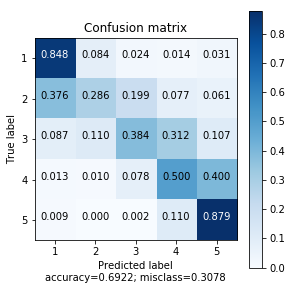

In [31]:
plot_confusion_matrix(conf_mat, target_names=[1,2,3,4,5], normalize=True)

### SVM Classifier

In [32]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC(penalty="l2",max_iter=1000)

#### Training the model

In [33]:
start = timeit.default_timer()
print(model.fit(train_feature_vector, train_labels))
print("Train time:",timeit.default_timer()-start)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
Train time: 23.648092520998034


In [34]:
pickle.dump(model,open("svm_model.pickle", "wb"))

#### Testing the model

In [35]:
y_pred = model.predict(dev_feature_vector)
conf_mat = confusion_matrix(dev_labels, y_pred)

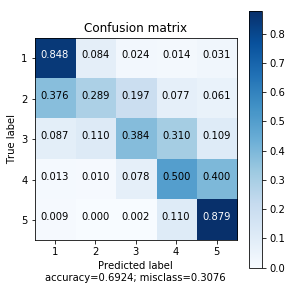

In [36]:
plot_confusion_matrix(conf_mat, target_names=[1,2,3,4,5], normalize=True)

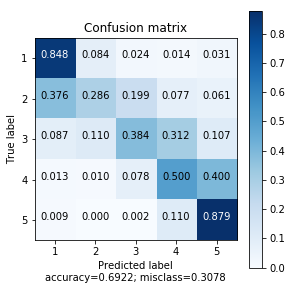

In [63]:
plot_confusion_matrix(conf_mat, target_names=[1,2,3,4,5], normalize=True)